In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal 
from mat4py import loadmat
from os import listdir
from os.path import isfile, join
myPath = "../data/"
#myPath = "C:\\Users\\Romain\\OneDrive\\Documents\\Cours\\Phelma\\3A SICOM\\Deuxieme_partie\\wind_turbine\\data"

files = [f for f in listdir(myPath) if isfile(join(myPath, f))]
files.pop(0)

'.DS_Store'

In [2]:
keyword = 'lss'
loaded_data = []
for file in files:
    if keyword in file:
        print(file)
        loaded_data.append(loadmat(myPath+file))

data = []
fs = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
    fs.append(b["fs"])
#TODO generate time  axis from sampling time  
fr = np.zeros(len(data))
for i in range(len(data)):
    data[i] = data[i][100:-100]
    fr[i] = (np.mean(data[i]))/60

fo = np.dot(fr, 7.65)
fi = np.dot(fr, 10.35)
print(fr, '\n', fo, '\n', fi)



2014-03-26-1730lss.mat
2014-04-01-1059lss.mat
2014-04-03-0737lss.mat
2014-04-09-1620lss.mat
2014-04-24-1349lss.mat
2014-04-28-0759lss.mat
[0.33334424 0.33334438 0.3333457  0.33334312 0.33334622 0.33334239] 
 [2.55008344 2.55008447 2.55009463 2.55007484 2.55009859 2.55006931] 
 [3.45011289 3.45011429 3.45012803 3.45010126 3.45013339 3.45009378]


2014-03-26-1730vib2.mat
2014-04-01-1059vib2.mat
2014-04-03-0737vib2.mat
2014-04-09-1620vib2.mat
2014-04-24-1349vib2.mat
2014-04-28-0759vib2.mat
Loaded and Data cropped


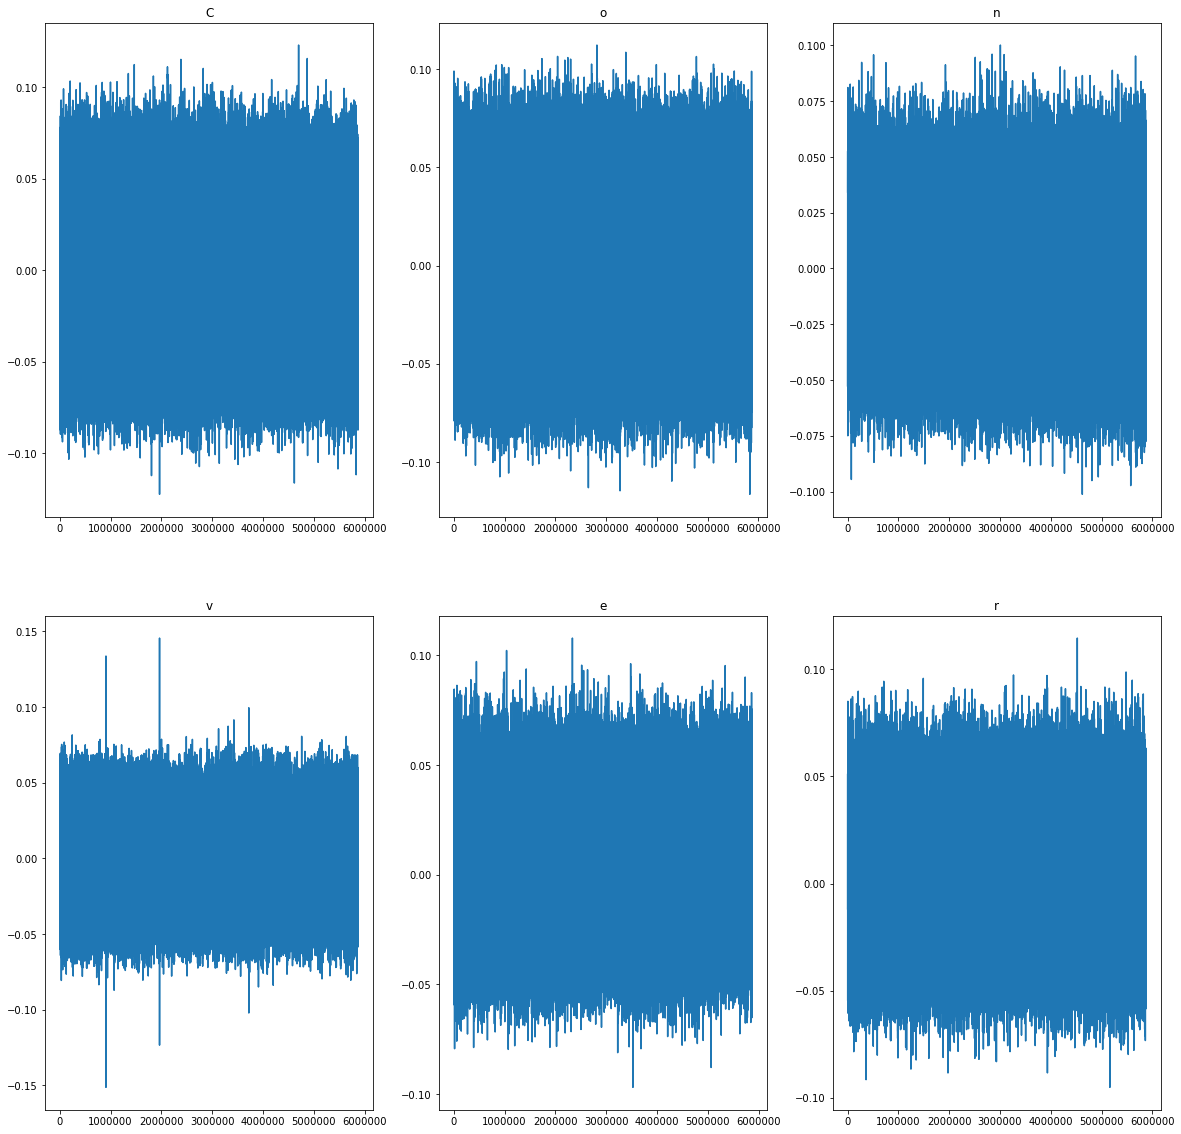

In [3]:
keywords  = ['hss', 'i1', 'i2', 'i3', 'lss', 'v1', 'v2', 'v3', 'vib1', 'vib2', 'vib3']
keyword = keywords[-2]
loaded_data = []
for file in files:
    if keyword in file:
        print(file)
        loaded_data.append(loadmat(myPath+file))

data = []
for i in range(len(loaded_data)):
    a = loaded_data[i]
    b = a[keyword]
    data.append(b["rawData"])
    fs = b["fs"]
#TODO generate time  axis from sampling time  

for i in range(len(data)):
    data[i] = data[i][100:-100]
print("Loaded and Data cropped")

plt.figure(figsize = (20,20))
for i in range(len(data)):        
    plt.subplot(231+i)
    plt.plot(data[i])
    plt.title(file[i])

c:\users\romain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


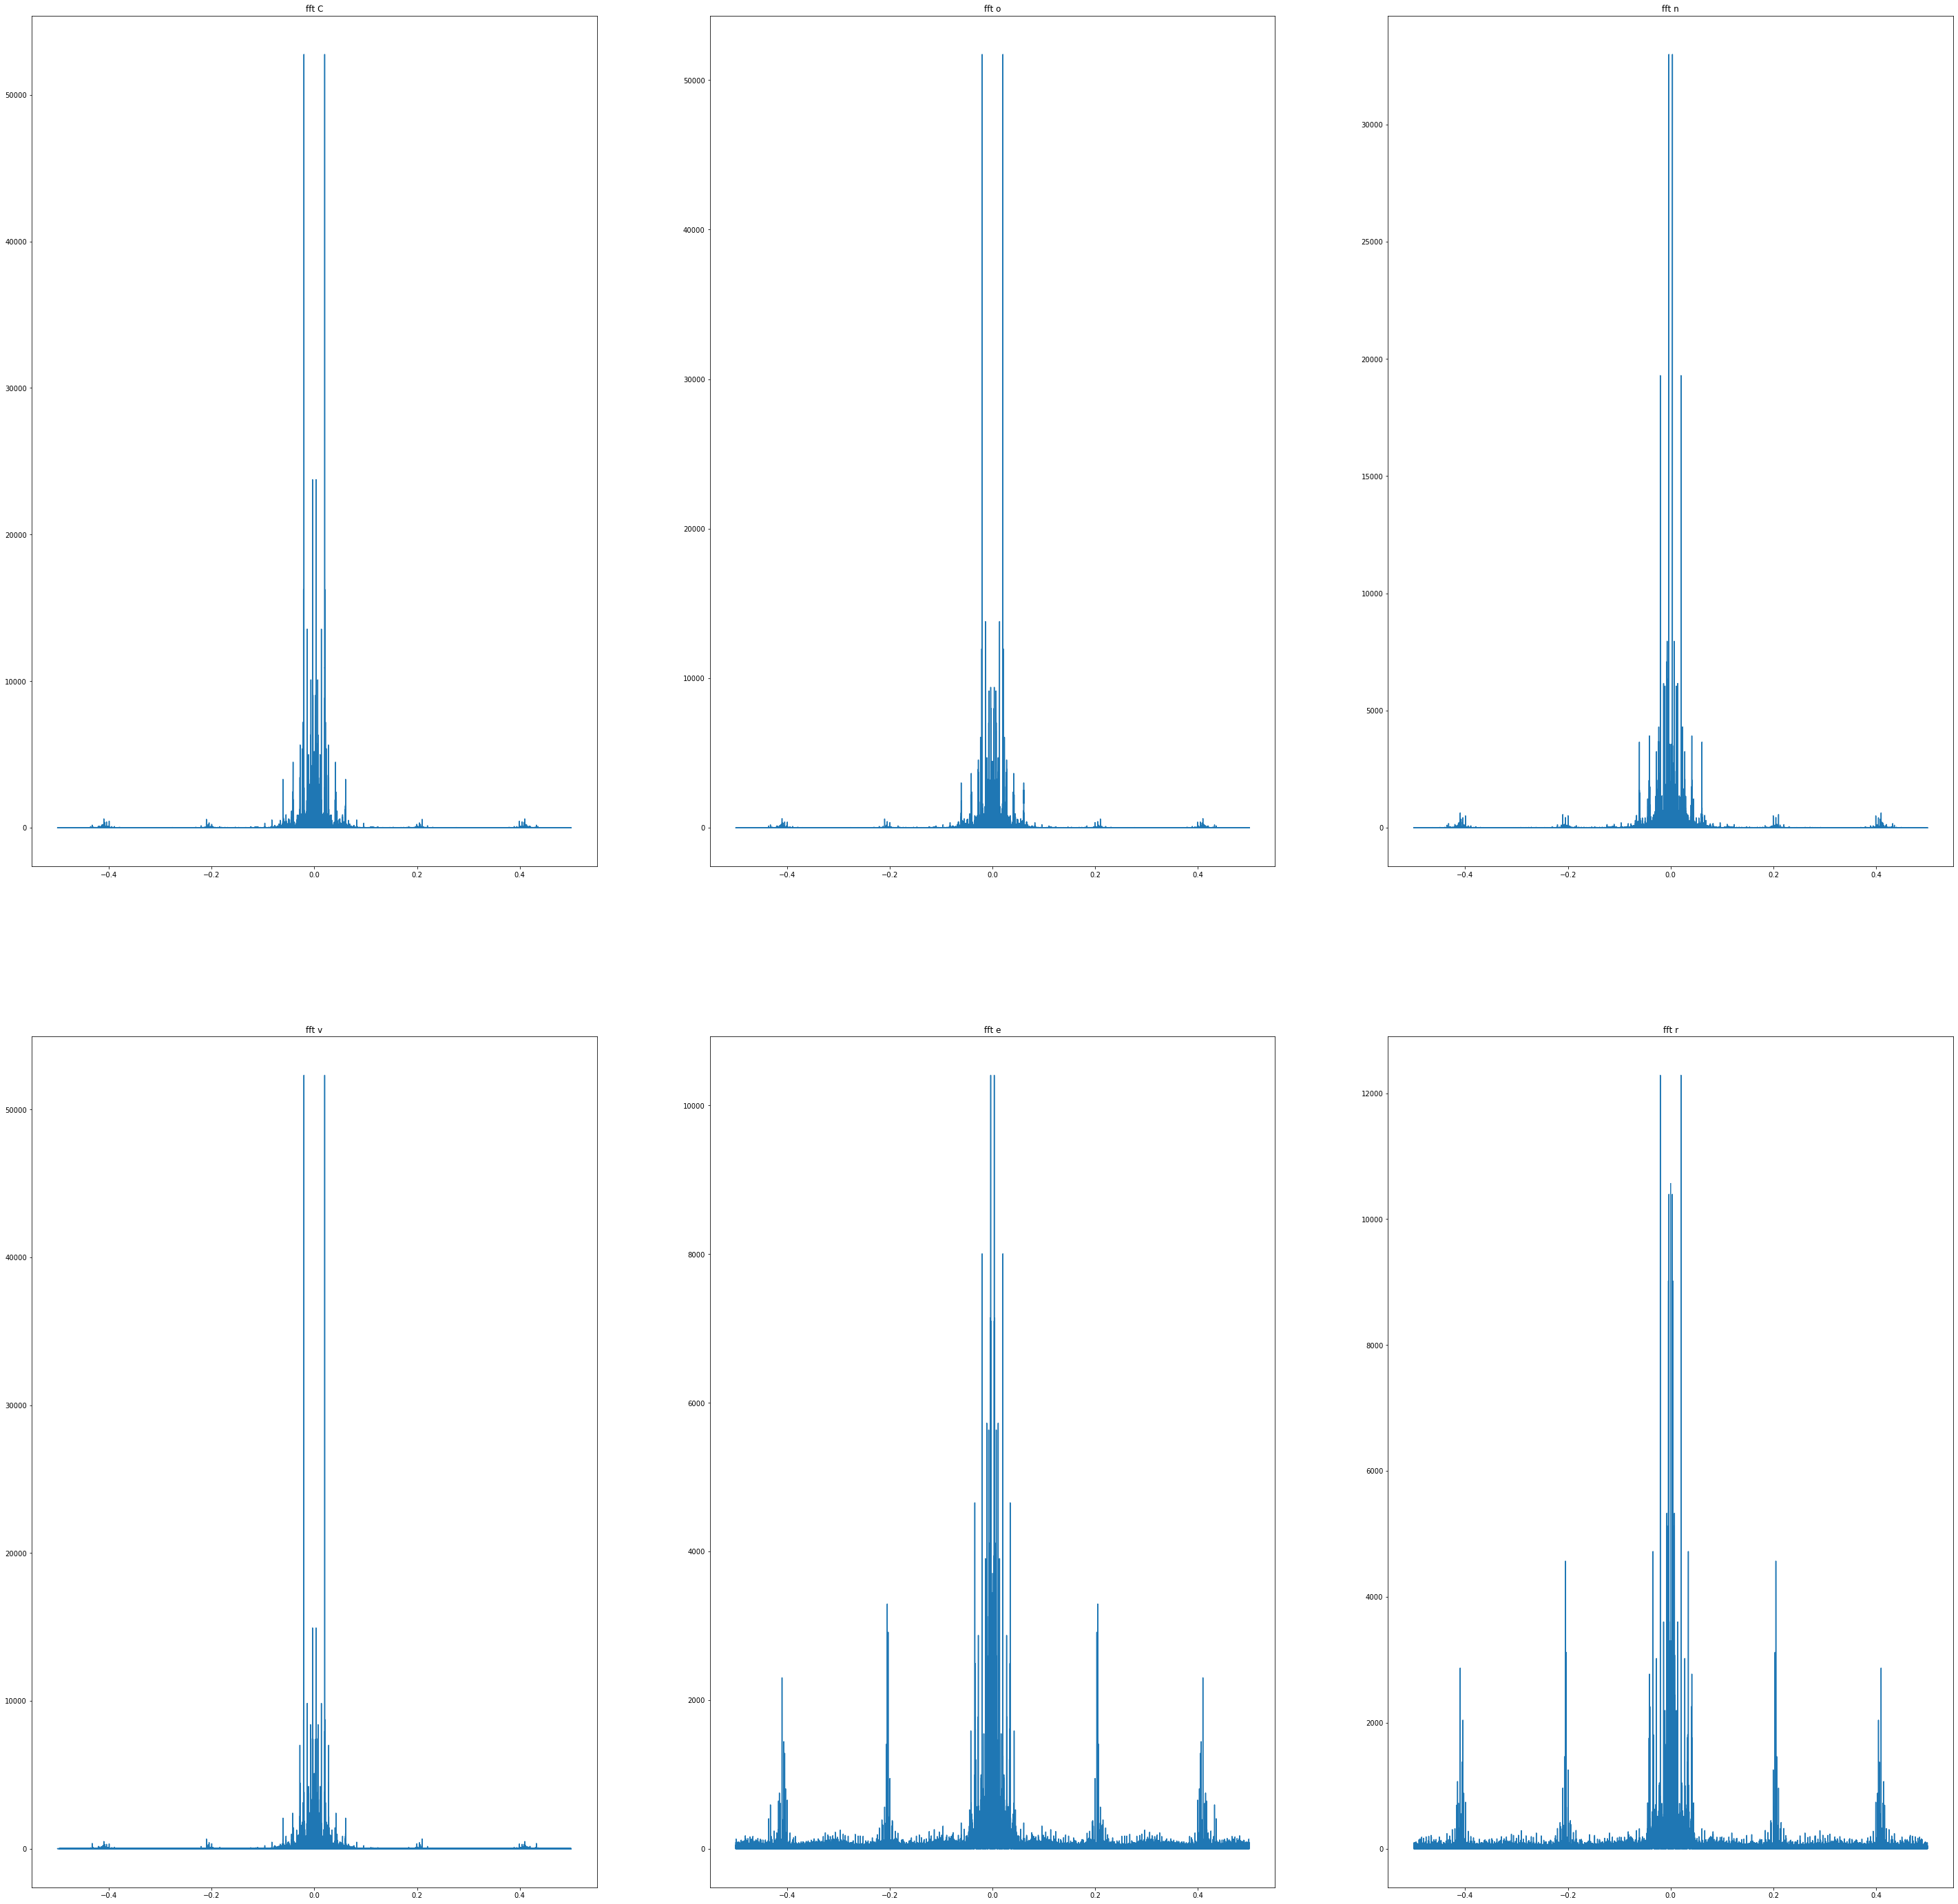

In [4]:
plt.figure(2, figsize = (50,50))
for i in range(len(data)): 
    plt.figure(2)
    plt.subplot(231+i)
    ft = np.absolute(np.fft.fft(data[i]))
    np.delete(ft, np.max(ft))
    ftFreq = np.fft.fftfreq(len(data[i]))
    plt.plot(ftFreq, ft)
    
    
    plt.title("fft " + file[i])
    
    #print(ft)

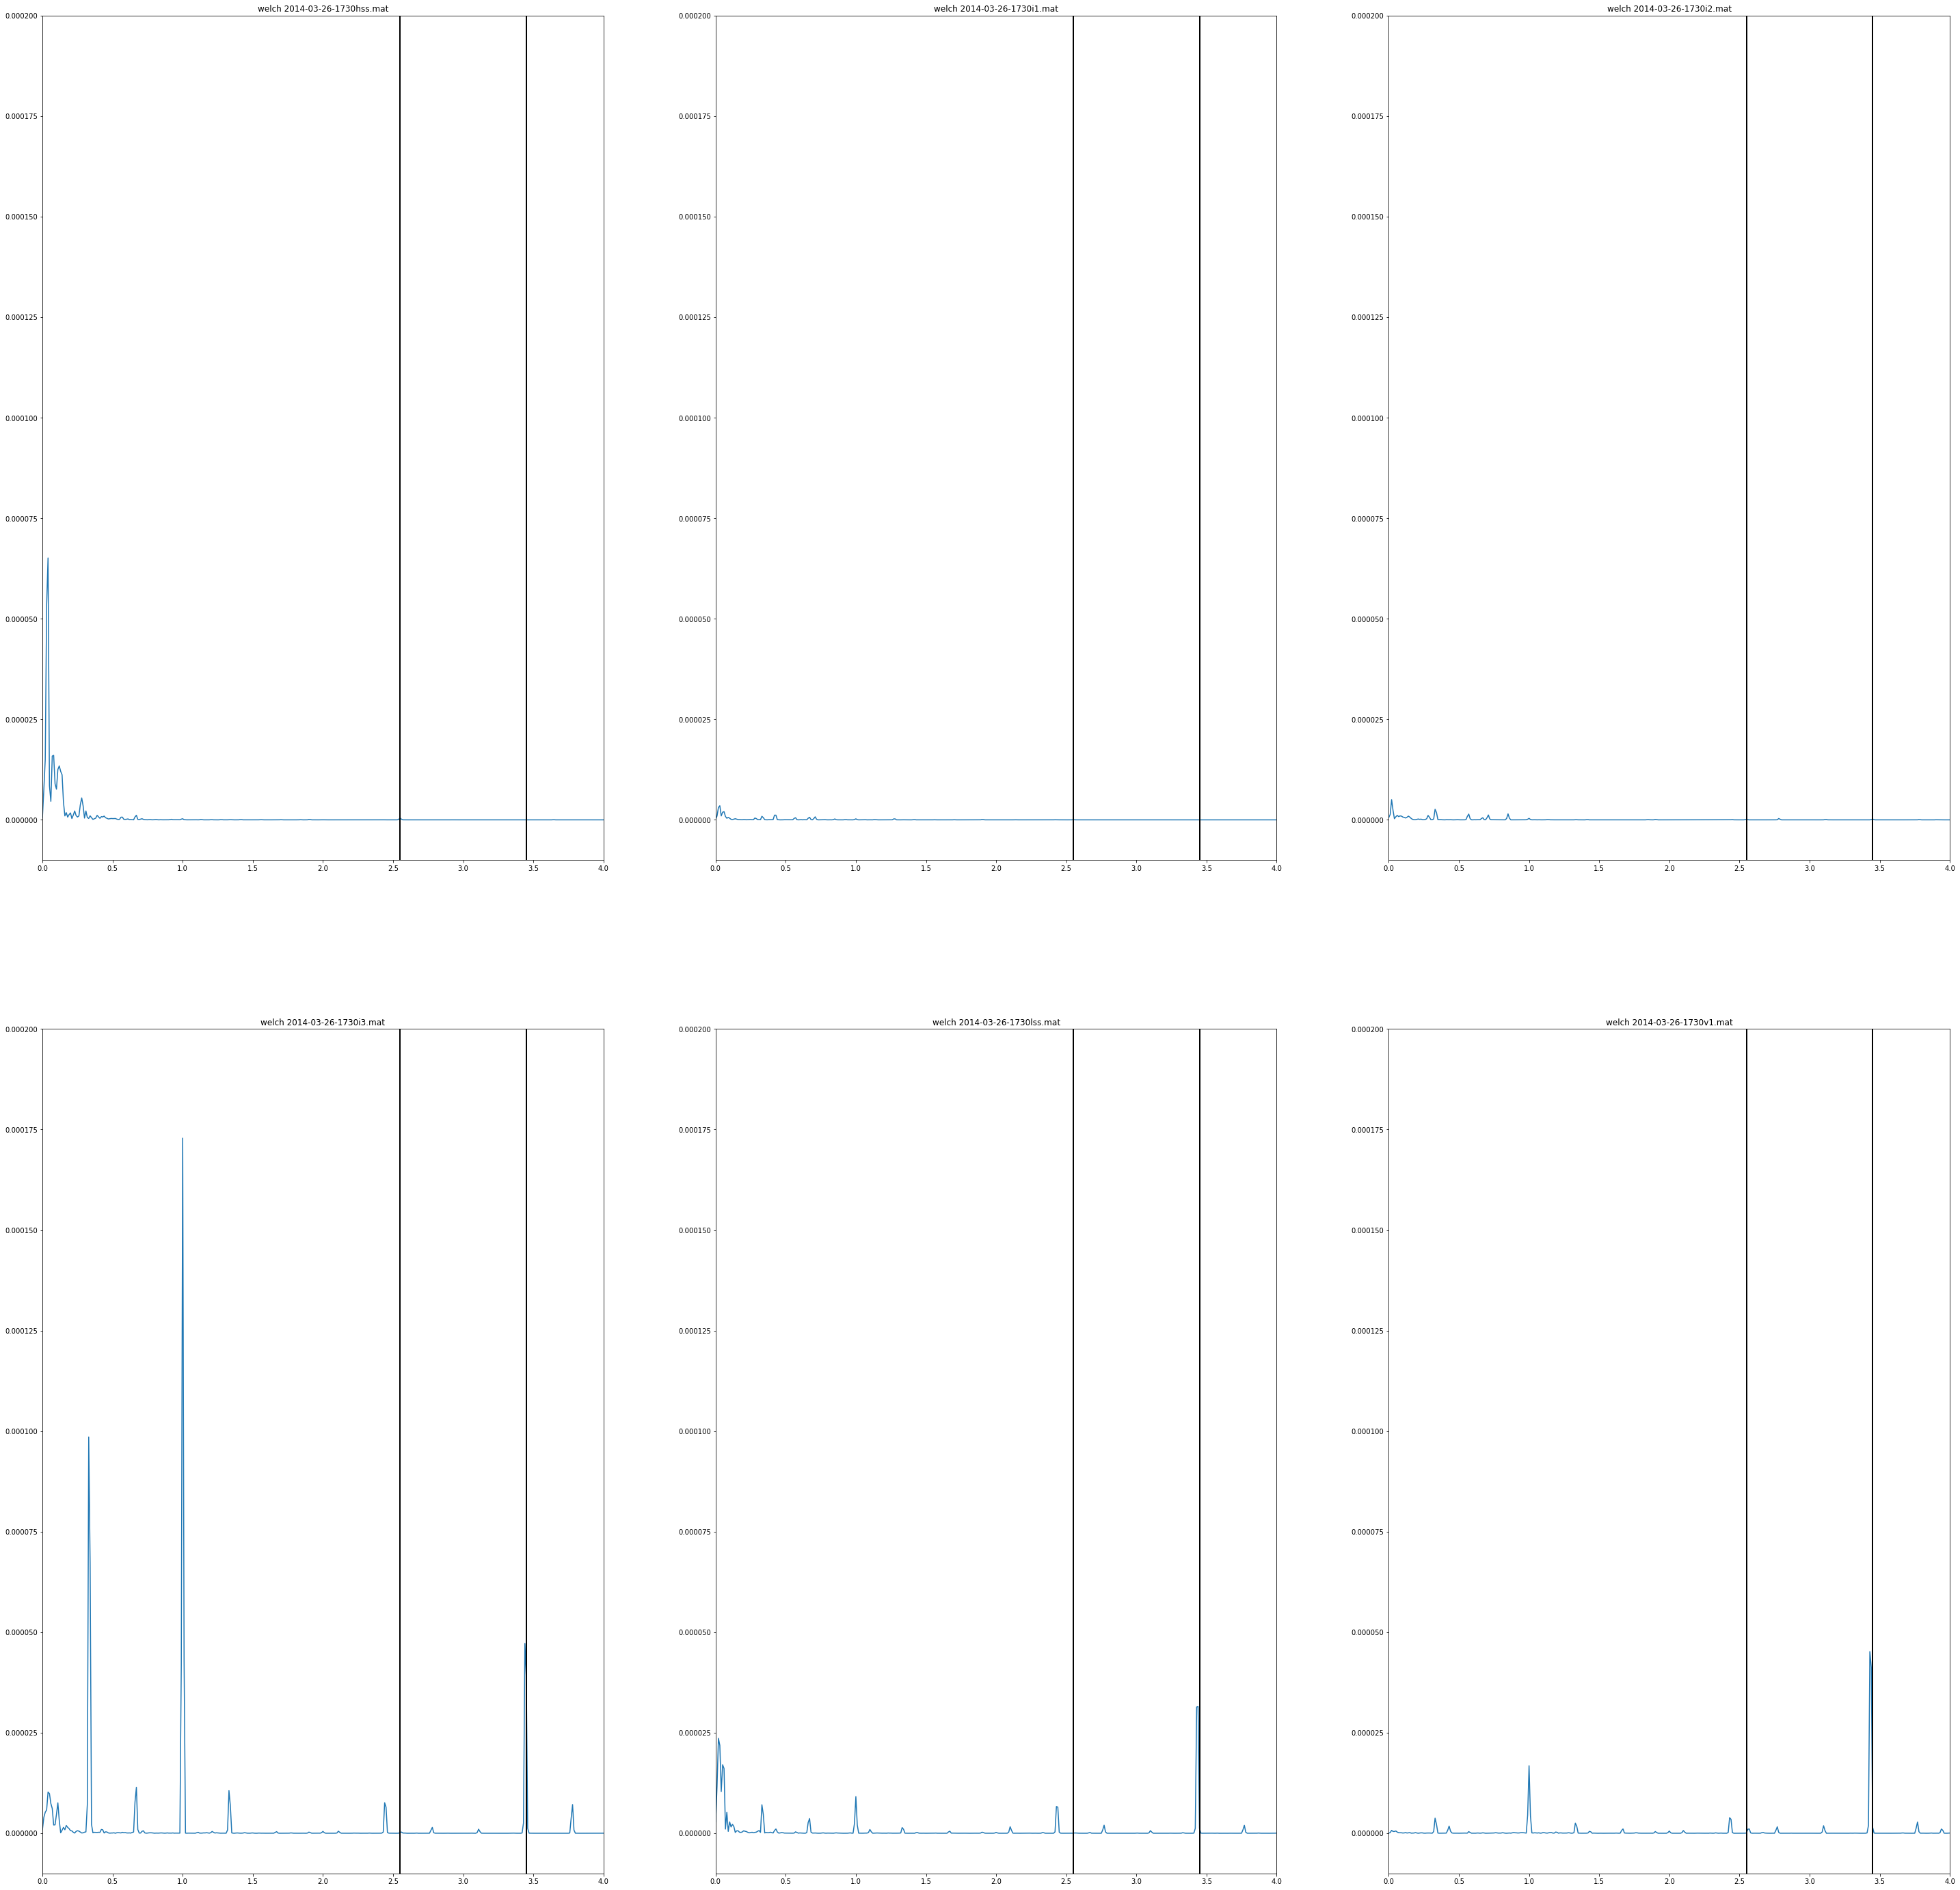

In [11]:
plt.figure(figsize = (50,50))

for i in range(len(data)):
    plt.subplot(231+i)
    #frq, welch = scipy.signal.welch(data[i], fs = fs, nperseg=8000, nfft=80000)
    frq, welch = scipy.signal.welch(data[i], fs = fs, nperseg=fs*100)
    plt.title("welch " + files[i])
    plt.plot(frq, welch)    
    plt.plot([fo[i], fo[i]], [-1,1], 'k-', lw=2)
    plt.plot([fi[i], fi[i]], [-1,1], 'k-', lw=2)
    plt.xlim((0,4))
    plt.ylim((-0.00001, 0.0002))

plt.savefig('./images/welch_vib2', dpi = 300)